In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
df= pd.read_csv('test_loan.csv')
df1= pd.read_csv('train_loan.csv')

# Project- Loan Prediction 

Aim of the project is to predict poeple that are likely to a get loan based on their background like Education, income, self employment, Credit history, etc.

I just imported the various libraries i will need for data munging and uploaded the dataset.



In [2]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


i will now describe the dataset to have a clearer picture of the data, seeing the average of each column, the mean and deviation, having an  idea of the skewness of the data.

In [3]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Some of these columns have non-numerical values(Property Area and Credit History). We can check thier frequency with this code

In [5]:
df1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Now we can plot a graph of the numerical-valued columns, starting with applicants income and Loan amount

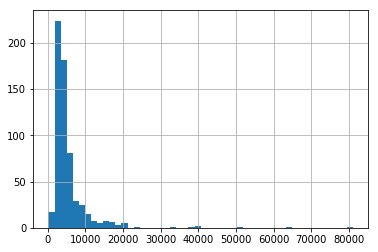

In [6]:
df1['ApplicantIncome'].hist(bins=50)

we can observed some extreme values on the graph. Next we make a box plot with the code below 

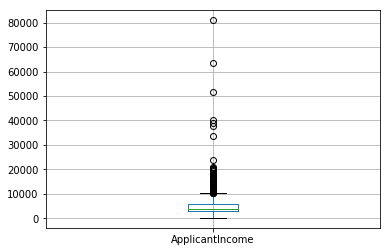

In [7]:
df1.boxplot(column='ApplicantIncome')

the box plot shows some skewness(extreme values) this can be as a result of educational status

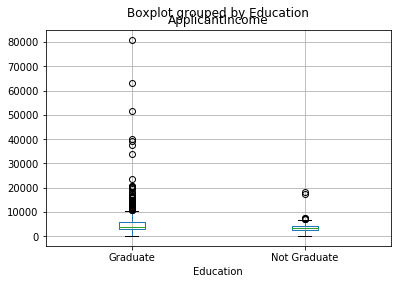

In [8]:
df1.boxplot(column='ApplicantIncome', by = 'Education')

We can see that most graduate have a far higher income than non-graduate. We also do a box plot for loan amount. Lets check the box plot for Laon amount

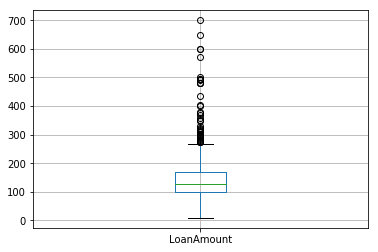

In [9]:
df1.boxplot(column='LoanAmount')

we can observe more extreme values which can be further seen on a histogram

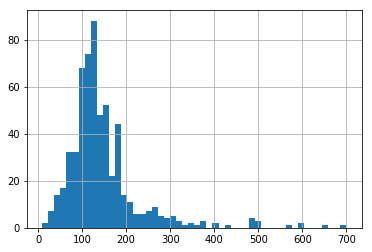

In [10]:
df1['LoanAmount'].hist(bins=50)

Now we have a clearer picture of the numerical values, lets also look at the categorical values through a pivoted table of excel but can also we done with python through the following codes. The probability of getting a loan is between 1 or 0 which is  yes or no 

In [11]:
temp1=df1['Credit_History'].value_counts(ascending=True)

temp2= df1.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1 , 'N':0}).mean())
print('Frequency table for Credit History:')

print(temp1)
print('\nprobability of getting loan from a credit customer:')
print(temp2)    



Frequency table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

probability of getting loan from a credit customer:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


we show a bar chart to show the number of applicant and the probability of getting a loan 

Text(0.5,1,'Probability of getting loan by Credit History')

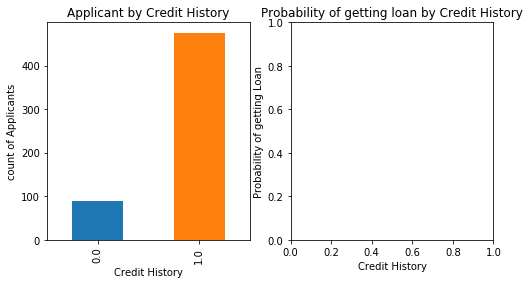

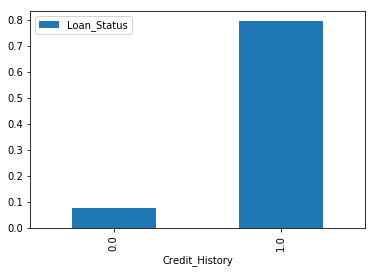

In [12]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('count of Applicants')
ax1.set_title('Applicant by Credit History')
temp1.plot(kind='bar')

ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting Loan')
ax2.set_title('Probability of getting loan by Credit History')



This shows the probability of getting a loan is more eight times more if you have a valid credit history. This can also be illustrated with a stacked chart

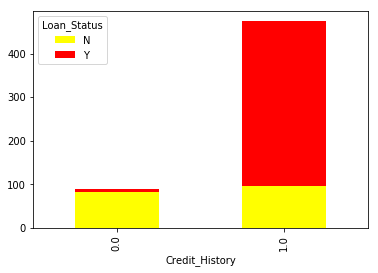

In [13]:
temp3=pd.crosstab(df1['Credit_History'], df1['Loan_Status'])
temp3.plot(kind='bar', stacked= True , color=['yellow' ,'red'], grid=False)


looking at the dataset, we can see two problems.
1. some of the columns has missing values. we have to fill them appropriately
2. some columns like credit history and Loan amount have extreme values that we have to deal with.

The code below shows the number of missing values various columns.

In [14]:
df1.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True )

In [16]:
df1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

We can see 500 people are not self employed and only 82 are self employed, so we can assumes the missing slots are not self employed. So we fill it up with the following code

In [17]:
df1['Self_Employed'].fillna('No', inplace=True)

next we write a pivot table that gives us the meidan of the loan amount using self employed and education columns. this Gives us a reliable value we should be fill up the loan amount column.This is done by create a function that returns th pivot table value when we call it

In [18]:
table= df1.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education' , aggfunc=np.median)


def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

# df1['LoanAmount'].fillna(df1[df1['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True )

df1['LoanAmount'].fillna(df1[df1['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

since the extreme values in loan amount can be possible as people can request high loan for their specific need, it is better to neutralise their effect with a long transformation instead of removing them.

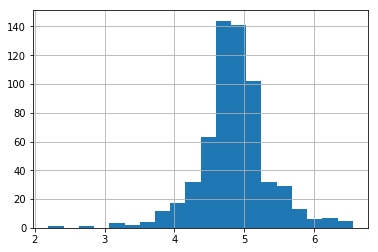

In [19]:
df1['LoanAmount_log'] = np.log(df1['LoanAmount'])

df1['LoanAmount_log'].hist(bins=20)

We see a much better graph than before

In [20]:
# df1['LoanAmount_log'].fillna(df1['LoanAmount_log'].mode()[0], inplace=True )

Since applicant income and coapplicant income contributes to a persons income, it would be wise to add them up and call this new income to total income and log transform it. 

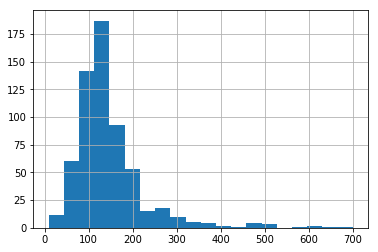

In [21]:
df1['TotalIncome']= df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1['TotalIncome_log'] = np.log(df1['TotalIncome'])
df1['LoanAmount'].hist(bins=20)

Now we can fill up the categorical values with the option that appears most with the following codes

In [ ]:
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True )
df1['Married'].fillna(df1['Married'].mode()[0], inplace=True )
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True )
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace=True )
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True )

In [23]:
df1['LoanPerIncome']= df1['LoanAmount']  / df1['TotalIncome']

Create this new columns, loan per total income gives us a good idea of who is likely to pay back

In [37]:
df1['LoanPerIncome']

0      0.022226
1      0.021015
2      0.022000
3      0.024287
4      0.023500
5      0.027775
6      0.024682
7      0.028520
8      0.030369
9      0.014658
10     0.017949
11     0.025115
12     0.017891
13     0.024291
14     0.007128
15     0.025253
16     0.027809
17     0.021652
18     0.027215
19     0.018852
20     0.013577
21     0.027202
22     0.025715
23     0.021204
24     0.022734
25     0.019979
26     0.024149
27     0.020889
28     0.024272
29     0.020573
         ...   
584    0.031037
585    0.023617
586    0.027232
587    0.032333
588    0.019789
589    0.038885
590    0.008728
591    0.034167
592    0.031207
593    0.019835
594    0.016129
595    0.028698
596    0.025328
597    0.029461
598    0.018067
599    0.033218
600    0.008317
601    0.027260
602    0.022444
603    0.021562
604    0.041333
605    0.018226
606    0.029322
607    0.029085
608    0.020841
609    0.024483
610    0.009742
611    0.030438
612    0.024660
613    0.029020
Name: LoanPerIncome, Len

Before we model the prediction algorithm, it is important we convert all the categorical values to numerical values

In [25]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df1[i] = le.fit_transform(df1[i])
df1.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
LoanPerIncome        float64
dtype: object

Here we import the necessary model and define a classification model which takes in an input, find the accuracy and cross validate the score as shown below

In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn import metrics

# def classification_model(model, data, predictors, outcome):
#     model.fit(data[predictors], data[outcome])
#     predictions=model.predict(data[predictors])
    
    
#     accuracy=metric.accuracy_score(prediction, data[outcome])
#     print(("Accuracy : %s" % "{0:.3%}".format(accuracy))
          
#     kf=KFold(data.shape[0], n_folds = 5)
#     error=[0]         
#     for train, test in kf:
#           train_predictor=(data[predictor].iloc[train,:])
#           train_targent = data[outcome].iloc[train]
#           model.fit= (train_predictor, train_targent)  
 
#           error.append(model.score(data[predictor].iloc[test,:], data[outcome].iloc[test]))
#           print(cross-validation score:%s" % "{0:.3%}".format(np.mean(error)))
  
#           model.fit(data[predictors], data[outcome])        
          
    
    
    
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

C:\Users\Eshe Tsado\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Logistic Regression
 we assertain that some certain factors, like education, income, credit history, Property area, etc. will determine the ability to get a loan.The cell below shows the first model with Credit History

In [27]:
outcome_var='Loan_Status'
model=LogisticRegression()
predictor_var= ['Credit_History']
classification_model(model, df1, predictor_var, outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [28]:
predictor_var= ['Married', 'Credit_History', 'Education','Property_Area','Self_Employed']
classification_model(model, df1, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


the accuracy isnt increasing, we will a better modelling technique in Decision tree 

In [29]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


here the categorical values are having little effect because the credit history is dorminant. Lets look at more numerical variables

In [30]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df1, predictor_var, outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.046%


we can see the increase in Accuracy but the validation went down because the more numerical values made the model overfitted. WE will look at another model, RANDOMFOREST

In [33]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender','Married','Dependents','Education',
       'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.690%


we have a 100% accuracy, this shows serious overfitting, this can be reduced by removing some predictors or tunning the values. First lets remove the less important variables. we can create a heatmap to see the most influencial columns

In [34]:
featimp =pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending= False)
print(featimp)

Credit_History      0.269270
TotalIncome_log     0.262705
LoanAmount_log      0.226189
Dependents          0.053688
Property_Area       0.051291
Loan_Amount_Term    0.044896
Married             0.026643
Self_Employed       0.022398
Gender              0.021541
Education           0.021380
dtype: float64


Lets pick the top 5 and work with them

In [39]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df1,predictor_var,outcome_var)

Accuracy : 82.736%
Cross-Validation Score : 81.437%


This gives us a better and well fitted evaluation 